## Import libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
#importing the datetime module
import datetime as dt
from datetime import datetime

In [3]:
#reading the dataset
df = pd.read_csv('spotify.csv')

## Access Dataset

In [4]:
#looking at the collapsed version of the dataset
df

,Date,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
0,2017-01-06,12287078,NaN,NaN,NaN,NaN
1,2017-01-07,13190270,NaN,NaN,NaN,NaN
2,2017-01-08,13099919,NaN,NaN,NaN,NaN
3,2017-01-09,14506351,NaN,NaN,NaN,NaN
4,2017-01-10,14275628,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
361,2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
362,2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
363,2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0
364,2018-01-08,4135505,2755266.0,2023251.0,2523265.0,2622693.0


In [5]:
#looking at the tail of the dataset
df.tail()

,Date,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
361,2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
362,2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
363,2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0
364,2018-01-08,4135505,2755266.0,2023251.0,2523265.0,2622693.0
365,2018-01-09,4168506,2791601.0,2058016.0,2727678.0,2627334.0


In [6]:
#looking at the datatypes, no. of NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      366 non-null    object 
 1   Shape of You              366 non-null    int64  
 2   Despacito                 359 non-null    float64
 3   Something Just Like This  319 non-null    float64
 4   HUMBLE.                   282 non-null    float64
 5   Unforgettable             275 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 17.3+ KB


### Conclusion from looking at the data, suggestions for cleaning
* The date column is a object data type and needs to converted to datetime
* The columns of shape of You,	Despacito,	Something Just Like This,	HUMBLE,	Unforgettable, should all be in lower case with underscore seperating spaces for easy analysis
* Nan values in this dataset could suggest that the song has not yet been released as at that  date, so we could change that to zero
* The columns of shape of You,	Despacito,	Something Just Like This,	HUMBLE,	Unforgettable, seem to sugests the number of likes on spotify and should all have int format


## Cleaning

#### Define
The date column is a object data type and needs to converted to datetime

#### clean

In [7]:
df['Date']= pd.to_datetime(df['Date'])

#### Access

In [8]:
#Date columns are converted to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      366 non-null    datetime64[ns]
 1   Shape of You              366 non-null    int64         
 2   Despacito                 359 non-null    float64       
 3   Something Just Like This  319 non-null    float64       
 4   HUMBLE.                   282 non-null    float64       
 5   Unforgettable             275 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 17.3 KB


#### Define
convert columns to lower case,with underscore seperating spaces for easy analysis

#### Clean

In [9]:
df.columns= df.columns.str.replace(' ','_').str.lower()
df.columns

Index(['date', 'shape_of_you', 'despacito', 'something_just_like_this',
       'humble.', 'unforgettable'],
      dtype='object')

In [10]:
#remove the fullstp from humble column
df.rename(columns = {'humble.':'humble'}, inplace = True)

#### Access

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      366 non-null    datetime64[ns]
 1   shape_of_you              366 non-null    int64         
 2   despacito                 359 non-null    float64       
 3   something_just_like_this  319 non-null    float64       
 4   humble                    282 non-null    float64       
 5   unforgettable             275 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 17.3 KB


#### Define
Covert all NaN to zero as they may suggest that the song hasn't been relesed at the stated date

#### Clean

In [12]:
df = df.fillna(0)

#### Access

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      366 non-null    datetime64[ns]
 1   shape_of_you              366 non-null    int64         
 2   despacito                 366 non-null    float64       
 3   something_just_like_this  366 non-null    float64       
 4   humble                    366 non-null    float64       
 5   unforgettable             366 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 17.3 KB


#### Define
convert columns in float format to int format

#### clean

In [14]:

df[['despacito','something_just_like_this','humble','unforgettable']] = df[['despacito','something_just_like_this','humble','unforgettable']].astype(int)

#### Access

In [15]:
df.head()

,date,shape_of_you,despacito,something_just_like_this,humble,unforgettable
0,2017-01-06,12287078,0,0,0,0
1,2017-01-07,13190270,0,0,0,0
2,2017-01-08,13099919,0,0,0,0
3,2017-01-09,14506351,0,0,0,0
4,2017-01-10,14275628,0,0,0,0


In [16]:
df.tail()

,date,shape_of_you,despacito,something_just_like_this,humble,unforgettable
361,2018-01-05,4492978,3450315,2408365,2685857,2869783
362,2018-01-06,4416476,3394284,2188035,2559044,2743748
363,2018-01-07,4009104,3020789,1908129,2350985,2441045
364,2018-01-08,4135505,2755266,2023251,2523265,2622693
365,2018-01-09,4168506,2791601,2058016,2727678,2627334


## Exploratory Data Analysis

## Questions to answer
* What song has the highest average likes overall
* what month has the highest likes for the song with overall highest likes
* what year has the highest likes on spotify based on given data

## 1) What song has the highest average likes overall

In [17]:
cols = ['shape_of_you', 'despacito', 'something_just_like_this', 'humble', 'unforgettable']

df[cols].mean()

shape_of_you                8.180297e+06
despacito                   8.990501e+06
something_just_like_this    3.787591e+06
humble                      3.582633e+06
unforgettable               3.522270e+06
dtype: float64

In [20]:
data_mean = pd.DataFrame(df[cols].mean(), columns=['mean_values'])
data_mean

,mean_values
shape_of_you,8.180297e+06
despacito,8.990501e+06
something_just_like_this,3.787591e+06
humble,3.582633e+06
unforgettable,3.522270e+06


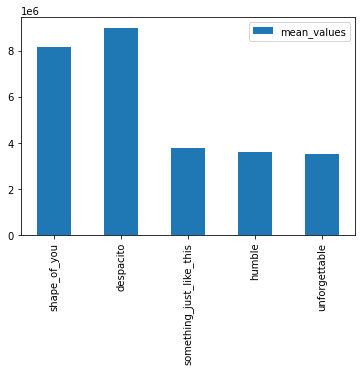

In [48]:

data_mean.plot(kind='bar');

## Insights
* The song despacito has the overall highest number of likes

## 2) what month has the highest likes for the song with overall highest likes

In [34]:
time_col = 'date'
time_data= df.resample('M', on =time_col)['despacito'].mean()
time_data

date
2017-01-31    2.749253e+06
2017-02-28    7.224711e+06
2017-03-31    6.605704e+06
2017-04-30    1.103421e+07
2017-05-31    2.032973e+07
2017-06-30    1.860881e+07
2017-07-31    1.490251e+07
2017-08-31    1.027746e+07
2017-09-30    6.585799e+06
2017-10-31    4.470703e+06
2017-11-30    3.249156e+06
2017-12-31    3.392184e+06
2018-01-31    3.594741e+06
Freq: M, Name: despacito, dtype: float64

Text(0.5, 1.0, 'Despacito Average likes per month')

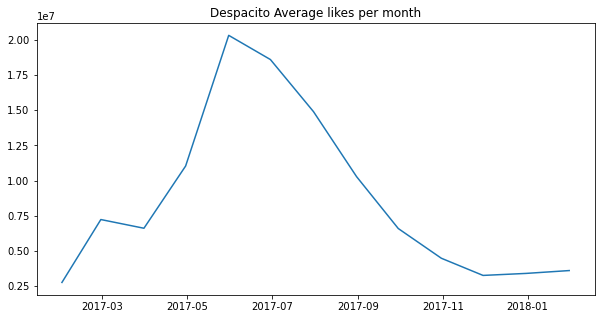

In [35]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(time_data)
plt.title('Despacito Average likes per month')

##  Insight
* June 2017 has the highest likes for the song Despacito which has the average overall higest likes

## 3) what year has the highest likes on spotify based on given data

In [38]:
time_col_2 = 'date'
time_data_2 = df.resample('M', on =time_col)['despacito','shape_of_you','something_just_like_this', 'humble', 'unforgettable'].mean()
time_data_2

,despacito,shape_of_you,something_just_like_this,humble,unforgettable
date,,,,,
2017-01-31,2.749253e+06,1.407720e+07,0.000000e+00,0.000000e+00,0.000000e+00
2017-02-28,7.224711e+06,1.454384e+07,1.698099e+06,0.000000e+00,0.000000e+00
2017-03-31,6.605704e+06,1.513262e+07,7.910273e+06,1.803770e+05,0.000000e+00
2017-04-30,1.103421e+07,1.133452e+07,7.693329e+06,9.171518e+06,1.322102e+06
2017-05-31,2.032973e+07,9.281713e+06,6.205372e+06,8.354521e+06,4.532494e+06
2017-06-30,1.860881e+07,7.561906e+06,5.040104e+06,6.217389e+06,6.264023e+06
2017-07-31,1.490251e+07,6.421739e+06,4.283810e+06,4.303651e+06,6.879395e+06
2017-08-31,1.027746e+07,5.382340e+06,3.402534e+06,3.686944e+06,6.601611e+06
2017-09-30,6.585799e+06,4.599358e+06,2.727978e+06,3.362585e+06,5.665275e+06


NameError: name 'legend' is not defined

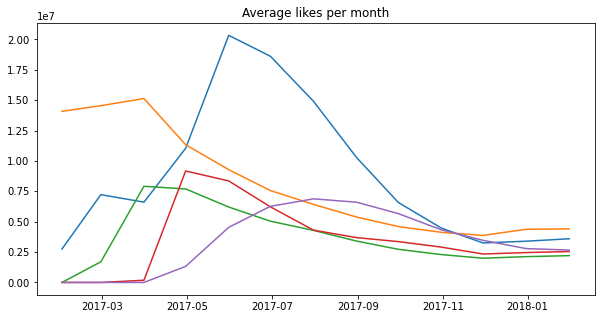

In [49]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(time_data_2)
plt.title('Average likes per month')
legend()

## Insight 
* based on the data given the year 2017 records more activity 